## Logistic Regression Analysis : 로지스틱 회귀 모형
- 독립변수(입력데이터)의 선형 결합으로 종속변수를 설명한다는 점에서 선형회귀분석과 유사
- 종속변수에 대해 연속형 데이터만 포함했던 선형회귀와 다르게 범주형 데이터를 포함할 수 있음
- 최종적으로 분류하려는 범주가 2개로 이루어진 경우에 사용하는 분류 알고리즘(이항분류)
- 주요 매개변수
    - c : 모델의 일반화 성능 및 복잡도를 설정하며 값이 작을수록 복잡도가 감소하고 값이 클수록 복잡도가 증가(default = 1.5)

In [5]:
# 로지스틱 회귀모델 실습용 데이터 생성
from sklearn.datasets import make_classification

In [17]:
# n_features(20)
# n_redundant : 독립변수와 선형상관관계가 있는 독립변수(2)
# n_informative : 독립변수 중 종속변수와 선형관계가 있는 설명변수(2)
# n_repeated : 독립변수 중 단순 중복인 독립변수(0)
# n_clusters_per_class : 범주당 클러스터으 개수(2) => 깔끔하게 분리되지 않는 결과
# n_classes: 종속변수의 범주 개수(2개)

X1,y1=make_classification(n_samples=100, n_features=1,n_redundant=0,n_informative=1,n_clusters_per_class=1)

In [19]:
y1

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [1]:
from sklearn.linear_model import LogisticRegression

In [4]:
log1=LogisticRegression(C=1e9)     # 10의 9승

In [20]:
log1.fit(X1,y1)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [21]:
log1.intercept_

array([3.72166813])

In [22]:
log1.coef_

array([[7.61771068]])

In [30]:
import numpy as np
import matplotlib.pyplot as plt

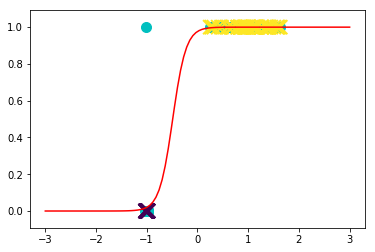

In [50]:

# 회귀식을 그래프상에 나타냄
# 실제 식을 작성
# 공식으로 그리기 위한 인위적인 작업
x=np.linspace(-3,3,100)
y= np.exp(log1.intercept_[0]+log1.coef_[0][0]*x)/(1+np.exp(log1.intercept_[0]+log1.coef_[0][0]*x))
plt.plot(x,y,color='r')
# 실제 데이터 값
plt.scatter(X1,y1,marker='o',s=100,color='c')

# 실제 독립변수와 모형을 통해 나욘 예측값(x로 표현)
plt.scatter(X1,log1.predict(X1),marker='x',c=y1,s=200,lw=2,alpha=3)
plt.show()

In [33]:
log1.score(X1,y1)

0.99

# C가 작은 경우

In [34]:
log2=LogisticRegression(C=0.1)

In [43]:
log2.fit(X1,y1)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
log2.intercept_

array([0.05527901])

In [45]:
log2.coef_

array([[1.5600781]])

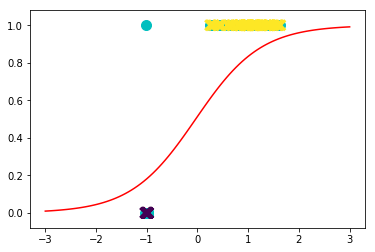

In [57]:
x2=np.linspace(-3,3,100)
y2=np.exp(log2.intercept_[0]+log2.coef_[0][0]*x2)/(1+np.exp(log2.intercept_[0]+log2.coef_[0][0]*x2))
plt.plot(x2,y2,color='r')

plt.scatter(X1,y1,marker='o',c='c',s=100)

plt.scatter(X1,log2.predict(X1),marker='x',s=100,c=y1,lw=3)
plt.show()

In [55]:
log2.score(X1,y1)

0.99